# Sensor Data - Feature Engineering

## Main tasks

1. Generate features  
    - 1.1 pages_total_stayTime   
    - 1.2 click_counts  
    - 1.3 pages_viewed_counts      
    - 1.4 median value of 'is_first_day', 'is_first_time' and 'weekend' per 'dist_id'  
    - 1.5 the first value of 'latest_referrer_host_bin', 'latest_utm_source_bin', 'browser_bin', 'city_bin' and 'model_bin' per 'dist_id'  
2. Transform data and define label   
    - 2.1 Converting categorical variables into dummy variables 
    - 2.2 define label
3. EDA with label  
    - 3.1 Scatter_matrix  
    - 3.2 Explore sign up rate split by features
        - 3.2.1 'is_first_day'
        - 3.2.2 'is_first_time'
        - 3.2.3 'weekend'
        - 3.2.4 'latest_referrer_host_bin'
        - 3.2.5 'latest_utm_source_bin' 
        - 3.2.6 'browser_bin'
        - 3.2.7 'city_bin'
        - 3.2.8 'model_bin'
        - 3.2.9 Abstract out the plotting machine 

In [660]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

# This statement allow to display plot without asking to
%matplotlib inline

# Always make it pretty.
plt.style.use('ggplot')

In [661]:
# set maximum shown rows as 15
pd.options.display.max_rows = 15

In [662]:
# Load data from file
df = pd.read_csv('../data/data_cleaned.csv')

In [663]:
df.head()

,dist_id,event,day,weekend,is_first_day,is_first_time,index_leave_stayTime,demo_leave_stayTime,about_leave_stayTime,courses_leave_stayTime,courses_play_leave_stayTime,latest_referrer_host_bin,latest_utm_source_bin,browser_bin,city_bin,model_bin
0,595466e9a8e733434ce08de16e927d985e0b5d48,index_leave,2017-03-06,0,True,False,0.006,0.000,0.0,0.0,0.0,sensordata,baidu,chrome,others,pc
1,9939d3e087bca29c42334d96dccd25ca0e06652a,$pageview,2017-03-06,0,True,True,0.000,0.000,0.0,0.0,0.0,sensordata,sensordata,chrome,others,pc
2,9939d3e087bca29c42334d96dccd25ca0e06652a,btnClick,2017-03-06,0,True,False,0.000,0.000,0.0,0.0,0.0,sensordata,sensordata,chrome,others,pc
3,9939d3e087bca29c42334d96dccd25ca0e06652a,btnClick,2017-03-06,0,True,False,0.000,0.000,0.0,0.0,0.0,sensordata,sensordata,chrome,others,pc
4,595466e9a8e733434ce08de16e927d985e0b5d48,demo_leave,2017-03-06,0,True,False,0.000,0.021,0.0,0.0,0.0,baidu,baidu,chrome,others,pc


In [664]:
df.describe()

,weekend,index_leave_stayTime,demo_leave_stayTime,about_leave_stayTime,courses_leave_stayTime,courses_play_leave_stayTime
count,65673.000000,65673.000000,65673.000000,65673.000000,65673.000000,65673.000000
mean,0.112268,0.710841,0.622782,0.082189,0.130101,0.061981
std,0.315699,15.977789,17.338813,5.756704,9.294202,4.769059
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1480.079000,2918.014000,951.302000,1749.192000,618.698000


## 1. Generate features
- 1.1 pages_total_stayTime   
- 1.2 click_counts  
- 1.3 pages_viewed_counts      
- 1.4 median value of 'is_first_day', 'is_first_time' and 'weekend' per 'dist_id'  
- 1.5 the first value of 'latest_referrer_host_bin', 'latest_utm_source_bin', 'browser_bin', 'city_bin' and 'model_bin' per 'dist_id'

### 1.1 pages_total_stayTime
Sum up the total stay time by pages per ‘dist_id’

In [665]:
# create feautre for total stay time in 'index' page
index_total_stayTime = df[['dist_id','index_leave_stayTime']].groupby(['dist_id']).sum()

In [666]:
# create feautre for total stay time in 'demo' page
demo_total_stayTime = df[['dist_id','demo_leave_stayTime']].groupby(['dist_id']).sum()

In [667]:
# create feautre for total stay time in 'about' page
about_total_stayTime = df[['dist_id','about_leave_stayTime']].groupby(['dist_id']).sum()

In [668]:
# create feautre for total stay time in 'courses' page
courses_total_stayTime = df[['dist_id','courses_leave_stayTime']].groupby(['dist_id']).sum()

In [669]:
# create feautre for total stay time in 'courses_play' page
courses_play_total_stayTime = df[['dist_id','courses_play_leave_stayTime']].groupby(['dist_id']).sum()

In [670]:
df_pages_total_stayTime = []
df_pages_total_stayTime = index_total_stayTime.join(demo_total_stayTime,on='dist_id',how='left').rename(columns = {'index_leave_stayTime': 'index_page_total_stayTime', 'demo_leave_stayTime': 'demo_page_total_stayTime'})
df_pages_total_stayTime = df_pages_total_stayTime.join(about_total_stayTime,on='dist_id',how='left').rename(columns = {'about_leave_stayTime': 'about_page_total_stayTime'})
df_pages_total_stayTime = df_pages_total_stayTime.join(courses_total_stayTime,on='dist_id',how='left').rename(columns = {'courses_leave_stayTime': 'courses_page_total_stayTime'})
df_pages_total_stayTime = df_pages_total_stayTime.join(courses_play_total_stayTime,on='dist_id',how='left').rename(columns = {'courses_play_leave_stayTime': 'courses_play_page_total_stayTime'})
df_pages_total_stayTime.shape

(11708, 5)

In [671]:
df_pages_total_stayTime.head()

,index_page_total_stayTime,demo_page_total_stayTime,about_page_total_stayTime,courses_page_total_stayTime,courses_play_page_total_stayTime
dist_id,,,,,
00007ef910b6c9911f1b89d01a09aa3fc862f4a9,0.000,0.0,0.0,0.000,0.0
000a216b72eff19bd0d5e17b9e676dd6ad9a38ac,921.142,0.0,0.0,0.000,0.0
000c46a27ef69fa22b56d253a9c72773338a1686,10.384,0.0,0.0,1.812,0.0
000ed1dcd942969b458c5b308937c6389c08f999,0.031,0.0,0.0,0.000,0.0
00111feff544ef5280a4c7064a362a9ea59c9389,0.000,0.0,0.0,0.000,0.0


### 1.2 click_counts
Sum up the click times per ‘dist_id’

In [672]:
# create feautre for click counts
df_click_counts = df[df['event'] == '$pageview']
df_click_counts = df_click_counts[['dist_id','event']].groupby(['dist_id']).count().rename(columns = {'event': 'click_counts'})
df_click_counts.shape

(11587, 1)

In [673]:
df_click_counts.head()

,click_counts
dist_id,
00007ef910b6c9911f1b89d01a09aa3fc862f4a9,1
000c46a27ef69fa22b56d253a9c72773338a1686,6
000ed1dcd942969b458c5b308937c6389c08f999,2
00111feff544ef5280a4c7064a362a9ea59c9389,1
0011f5066b1c62717255852fdb15a0473a5c2b19,3


In [674]:
# combined all the features generated so far
df_generated_features = df_pages_total_stayTime.join(df_click_counts,on='dist_id',how='left')

### 1.3 pages_viewed_counts
Sum up the page viewed count per ‘dist_id’

In [676]:
# create feautre for pages viewed counts
df_pages_viewed_counts = df[df['event'].isin(['index_leave', 'demo_leave', 'about_leave', 'courses_leave', 'courses_play_leave'])]
df_pages_viewed_counts = df_pages_viewed_counts[['dist_id','event']].groupby(['dist_id']).count().rename(columns = {'event': 'pages_viewed_counts'})
df_pages_viewed_counts.shape

(7355, 1)

In [677]:
df_pages_viewed_counts.head()

,pages_viewed_counts
dist_id,
000a216b72eff19bd0d5e17b9e676dd6ad9a38ac,1
000c46a27ef69fa22b56d253a9c72773338a1686,7
000ed1dcd942969b458c5b308937c6389c08f999,1
0011f5066b1c62717255852fdb15a0473a5c2b19,1
0012ea1b517e6959354abaa6954711054ec831b9,1


In [679]:
# combined all the features generated so far
df_generated_features = df_generated_features.join(df_pages_viewed_counts,on='dist_id',how='left')

###  1.4 median value of 'is_first_day', 'is_first_time' and 'weekend' per 'dist_id'

In [680]:
feautre_list = ['is_first_day', 'is_first_time', 'weekend']

In [681]:
def generate_features_with_median_value(df, df_combined, feautre_list):
    for feautre in feautre_list:
        df_combined = df_combined.join(df[['dist_id', feautre]].groupby(['dist_id']).median(),on='dist_id',how='left')
    return df_combined

In [682]:
df_generated_features = generate_features_with_median_value(df, df_generated_features, feautre_list)

In [683]:
# replace with non-zero value with 1
df_generated_features.is_first_day[df_generated_features.is_first_day > 0] = 1
df_generated_features.is_first_time[df_generated_features.is_first_time > 0] = 1
df_generated_features.weekend[df_generated_features.weekend > 0] = 1

###  1.5  the first value of 'latest_referrer_host_bin', 'latest_utm_source_bin', 'browser_bin', 'city_bin' and 'model_bin' per 'dist_id'

In [684]:
df_first = df.sort_values(['dist_id','is_first_time'],ascending=True).groupby('dist_id').head(1)

In [685]:
selected_featres = ['dist_id','latest_referrer_host_bin', 'latest_utm_source_bin', 'browser_bin', 'city_bin','model_bin']
df_first = df_first[selected_featres].set_index('dist_id')

In [686]:
# combined all the features generated so far
df_generated_features = df_generated_features.join(df_first,on='dist_id',how='left')

In [687]:
df_generated_features = df_generated_features.fillna(0)

In [688]:
df_generated_features.head()

,index_page_total_stayTime,demo_page_total_stayTime,about_page_total_stayTime,courses_page_total_stayTime,courses_play_page_total_stayTime,click_counts,pages_viewed_counts,is_first_day,is_first_time,weekend,latest_referrer_host_bin,latest_utm_source_bin,browser_bin,city_bin,model_bin
dist_id,,,,,,,,,,,,,,,
00007ef910b6c9911f1b89d01a09aa3fc862f4a9,0.000,0.0,0.0,0.000,0.0,1.0,0.0,1.0,0.0,0.0,baidu,baidu,others,others,others
000a216b72eff19bd0d5e17b9e676dd6ad9a38ac,921.142,0.0,0.0,0.000,0.0,0.0,1.0,0.0,0.0,1.0,baidu,baidu,chrome,Beijing,mac
000c46a27ef69fa22b56d253a9c72773338a1686,10.384,0.0,0.0,1.812,0.0,6.0,7.0,1.0,0.0,0.0,sensordata,sensordata,chrome,Shenzhen,pc
000ed1dcd942969b458c5b308937c6389c08f999,0.031,0.0,0.0,0.000,0.0,2.0,1.0,1.0,0.0,1.0,others,others,others,Shanghai,pc
00111feff544ef5280a4c7064a362a9ea59c9389,0.000,0.0,0.0,0.000,0.0,1.0,0.0,1.0,1.0,0.0,sensordata,baidu,others,Beijing,others


## 2. Transform data and define label
- 2.1 Converting categorical variables into dummy variables 
- 2.2 define label

### 2.1 Converting categorical variables into dummy variables

In [689]:
# Encode categorical columns to numeric values
col_category = ['latest_referrer_host_bin', 'latest_utm_source_bin', 
                'browser_bin', 'city_bin', 'model_bin']
df_dummies = pd.get_dummies(df_generated_features[col_category], columns=col_category)

In [690]:
# combine dummy variables
df_generated_features = df_generated_features.join(df_dummies)

In [691]:
df_generated_features.head()

,index_page_total_stayTime,demo_page_total_stayTime,about_page_total_stayTime,courses_page_total_stayTime,courses_play_page_total_stayTime,click_counts,pages_viewed_counts,is_first_day,is_first_time,weekend,...,browser_bin_chrome,browser_bin_others,city_bin_Beijing,city_bin_Guangzhou,city_bin_Shanghai,city_bin_Shenzhen,city_bin_others,model_bin_mac,model_bin_others,model_bin_pc
dist_id,,,,,,,,,,,,,,,,,,,,,
00007ef910b6c9911f1b89d01a09aa3fc862f4a9,0.000,0.0,0.0,0.000,0.0,1.0,0.0,1.0,0.0,0.0,...,0,1,0,0,0,0,1,0,1,0
000a216b72eff19bd0d5e17b9e676dd6ad9a38ac,921.142,0.0,0.0,0.000,0.0,0.0,1.0,0.0,0.0,1.0,...,1,0,1,0,0,0,0,1,0,0
000c46a27ef69fa22b56d253a9c72773338a1686,10.384,0.0,0.0,1.812,0.0,6.0,7.0,1.0,0.0,0.0,...,1,0,0,0,0,1,0,0,0,1
000ed1dcd942969b458c5b308937c6389c08f999,0.031,0.0,0.0,0.000,0.0,2.0,1.0,1.0,0.0,1.0,...,0,1,0,0,1,0,0,0,0,1
00111feff544ef5280a4c7064a362a9ea59c9389,0.000,0.0,0.0,0.000,0.0,1.0,0.0,1.0,1.0,0.0,...,0,1,1,0,0,0,0,0,1,0


### 2.2 define label 

#### We define 'signup' with the action 'click_send_cellphone', which means 'dist_id' attempts to sign up an account.

In [692]:
# create label '1' for 'dist_id' who has 'event' == 'click_send_cellphone' record
df_label = df[df['event'] == 'click_send_cellphone']
df_label = df_label[['dist_id','event']].groupby(['dist_id']).count().rename(columns = {'event': 'sign_up'})
df_label.shape

(501, 1)

In [693]:
# combine lable with features
df_cleaned = df_generated_features.join(df_label, on = 'dist_id', how = 'left')

In [694]:
# fill '0' for 'dist_id' did not sign up
df_cleaned.sign_up[df_cleaned.sign_up > 1] = 1
df_cleaned = df_cleaned.fillna(0)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [695]:
df_cleaned['sign_up'].value_counts()

0.0    11207
1.0      501
Name: sign_up, dtype: int64

In [696]:
print("sign up rate is only %.2f"% (df_cleaned['sign_up'].mean() * 100),"%")

sign up rate is only 4.28 %


## 3. EDA with label 
- 3.1 Scatter_matrix  
- 3.2 Explore sign up rate split by features
  - 3.2.1 'is_first_day'
  - 3.2.2 'is_first_time'
  - 3.2.3 'weekend'
  - 3.2.4 'latest_referrer_host_bin'
  - 3.2.5 'latest_utm_source_bin' 
  - 3.2.6 'browser_bin'
  - 3.2.7 'city_bin'
  - 3.2.8 'model_bin'
  - 3.2.9 Abstract out the plotting machine

### 3.1 Scatter_matrix

In [697]:
# 'red' for 'sign_up', 'blue' for not_sign_up
colors = ['red' if ix else 'blue' for ix in df_cleaned['sign_up']]

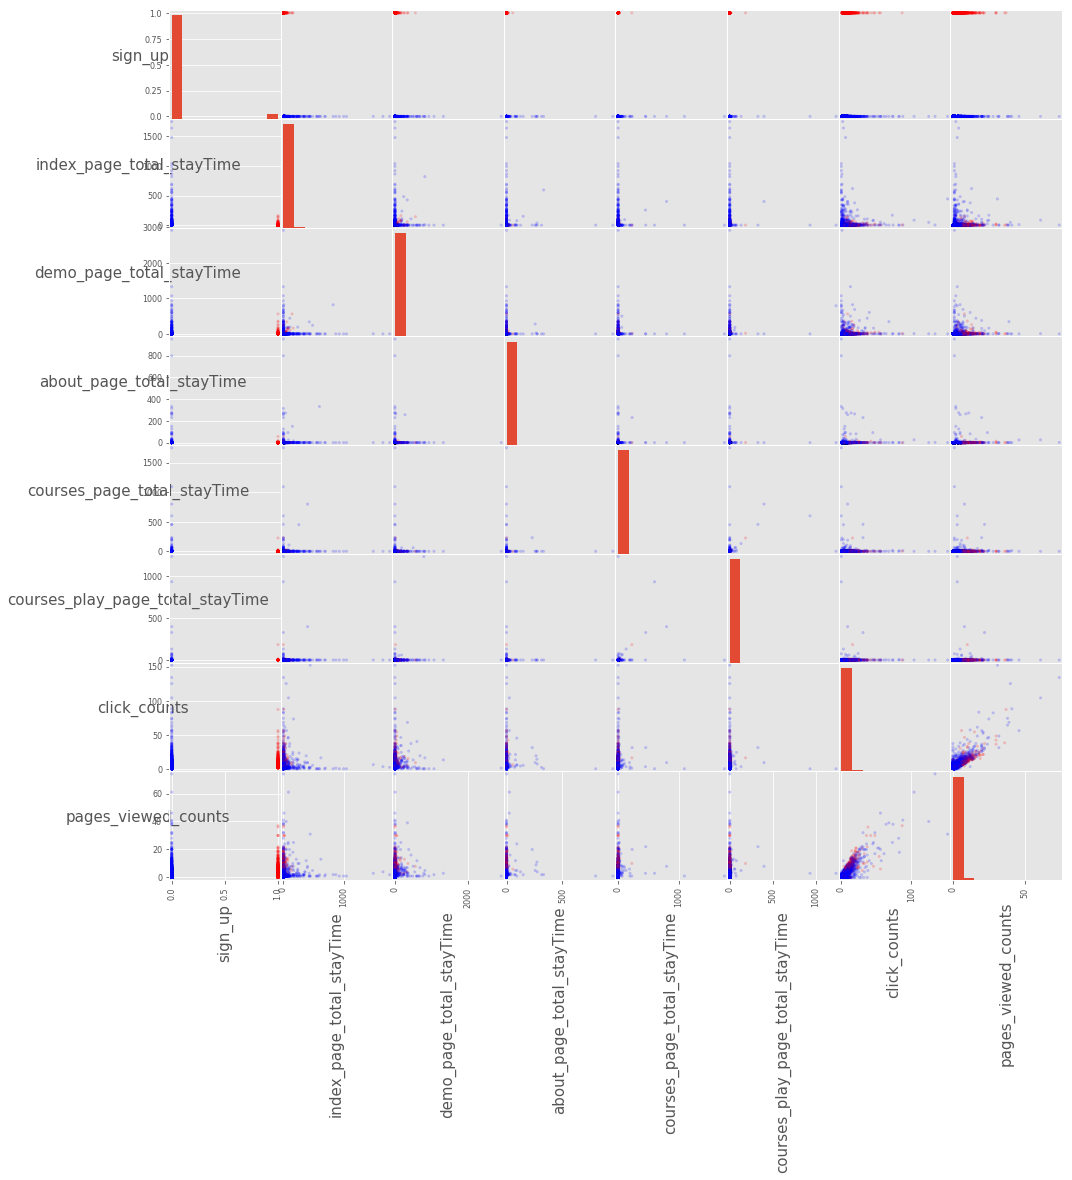

In [724]:
from pandas.plotting import scatter_matrix

scatter_matrix = scatter_matrix(df_cleaned[[u'sign_up', u'index_page_total_stayTime', 
                           u'demo_page_total_stayTime', u'about_page_total_stayTime', 
                           u'courses_page_total_stayTime', u'courses_play_page_total_stayTime', 
                           u'click_counts', u'pages_viewed_counts']],
               alpha=0.2, figsize=(16, 16), diagonal='hist', c=colors)

for ax in scatter_matrix.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 15, rotation = 90)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 15, rotation = 0)
    
#plt.show()
plt.savefig(r"scatter_matrix.png",bbox_inches="tight",dpi=500)    

##### Insights:
We notice 'click_counts' and 'pages_viewed_counts' are highly correlated with 'sign_up'.

### 3.2 Explore sign up rate split by features

#### 3.2.1 'is_first_day'

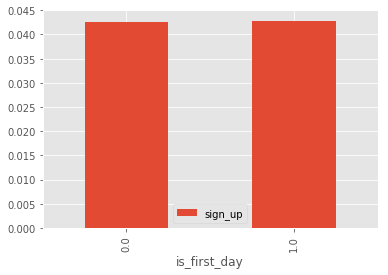

In [700]:
df_cleaned[['is_first_day', 'sign_up']].groupby(['is_first_day']).mean().plot.bar()

##### insights:
There is nearly no difference between Sign_up rate of 'is_first_day' or not, we can drop this feature.

#### 3.2.2 'is_first_time' 

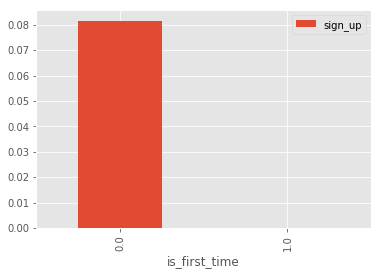

In [701]:
df_cleaned[['is_first_time', 'sign_up']].groupby(['is_first_time']).mean().plot.bar()

##### insights:
All users with 'is_first_time' value '1' did not sign_up, which means highly interested users will come to register another time.

####  3.2.3 'weekend'

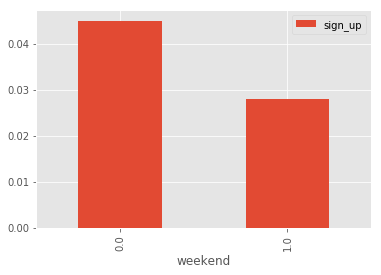

In [702]:
df_cleaned[['weekend', 'sign_up']].groupby(['weekend']).mean().plot.bar()

##### insights:
Sign_up rate of 'weekend' is obviously lower than that of 'weekdays', perhaps users visit our website more for work purposes.

####  3.2.4 'latest_referrer_host_bin'

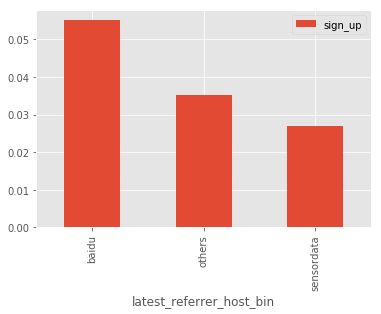

In [703]:
df_cleaned[['latest_referrer_host_bin', 'sign_up']].groupby(['latest_referrer_host_bin']).mean().plot.bar()

##### insights:
Sign_up rate of 'latest_referrer_host_bin' with value 'baidu' is obviously higher than those of others.

#### 3.2.5 'latest_utm_source_bin' 

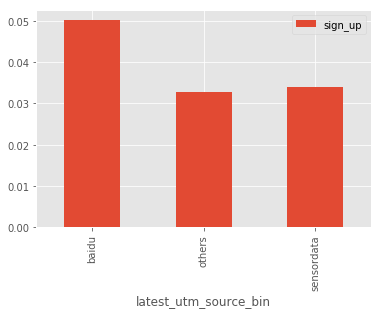

In [704]:
df_cleaned[['latest_utm_source_bin', 'sign_up']].groupby(['latest_utm_source_bin']).mean().plot.bar()

##### insights:
Sign_up rate of 'latest_utm_source_bin' with value 'baidu' is obviously higher than those of others, if we want to run marketing campaign, 'baidu' should be allocated more budget to. 

#### 3.2.6 'browser_bin'

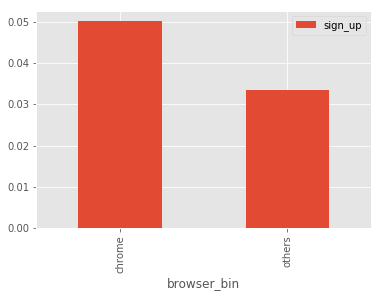

In [705]:
df_cleaned[['browser_bin', 'sign_up']].groupby(['browser_bin']).mean().plot.bar()

##### insights:
Sign_up rate of 'browser_bin' with value 'chrome' is obviously higher than those of others.

####  3.2.7 'city_bin'

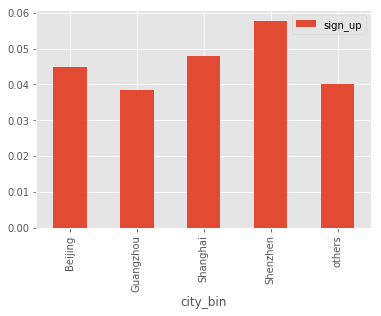

In [706]:
df_cleaned[['city_bin', 'sign_up']].groupby(['city_bin']).mean().plot.bar()

##### insights:
Sign_up rate of 'city_bin' with value 'Shenzhen' is slightly higher than those of others.

####  3.2.8 'model_bin'

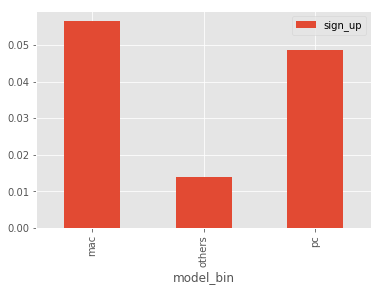

In [707]:
df_cleaned[['model_bin', 'sign_up']].groupby(['model_bin']).mean().plot.bar()

##### insights:
Sign_up rate of 'model_bin' with value 'mac' and 'pc' are much higher than those of others.

#### 3.2.9 Abstract out the plotting machine 

In [708]:
def hist_sign_up_vs_not_sign_up(df, col_name):
    is_sign_up = df['sign_up'] == 1
    fig, axes = plt.subplots(nrows=1, ncols=2)
    axes[0].hist(df[is_sign_up][col_name].values)
    axes[0].set_title("sign_up users")
    axes[0].set_xlabel(col_name)
    axes[0].set_ylabel("counts")
    axes[1].hist(df[~is_sign_up][col_name].values)
    axes[1].set_title("not_sign_up users")
    axes[1].set_xlabel(col_name)
    axes[1].set_ylabel("counts")
    fig.tight_layout()
    plt.show()

In [725]:
cols = [u'index_page_total_stayTime', u'demo_page_total_stayTime', 
        u'about_page_total_stayTime', u'courses_page_total_stayTime', 
        u'courses_play_page_total_stayTime', u'click_counts', 
        u'pages_viewed_counts']

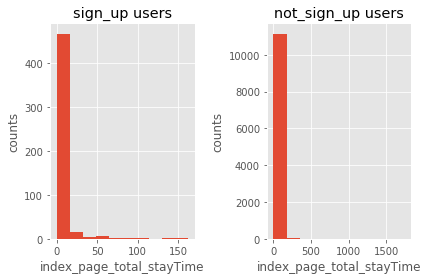

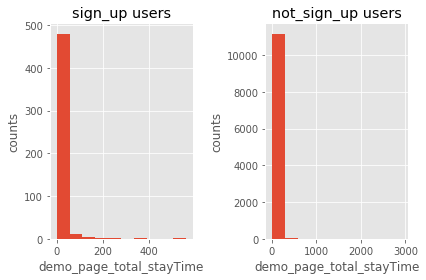

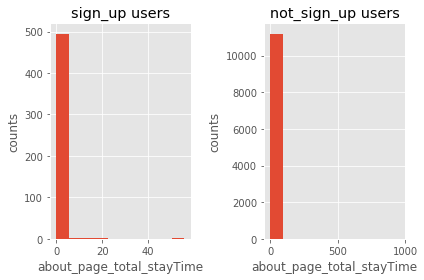

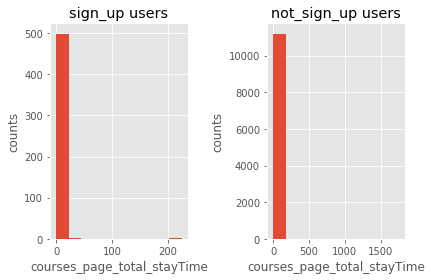

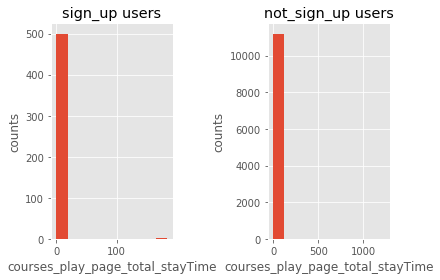

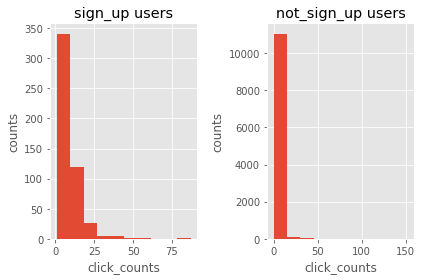

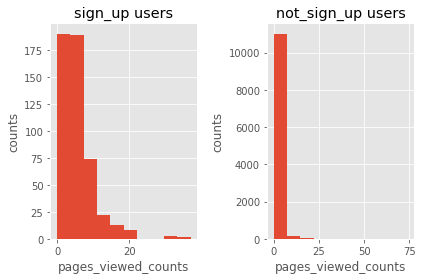

In [726]:
for col in cols:
    hist_sign_up_vs_not_sign_up(df_cleaned, col_name=col)

##### Insights:
As what we observed in the scatter_matrix plotted above, distribution of 'click_counts' of 'sign_up_users' and 'not_sign_up_users' are obviously different, the same idea with 'pages_viewed_counts'

### Save cleaned data to csv file

In [727]:
selected_columns = [u'index_page_total_stayTime', u'demo_page_total_stayTime', u'about_page_total_stayTime',
       u'courses_page_total_stayTime', u'courses_play_page_total_stayTime', u'click_counts',
       u'pages_viewed_counts', u'is_first_time', u'weekend',
       u'latest_referrer_host_bin_baidu', u'latest_referrer_host_bin_others',
       u'latest_referrer_host_bin_sensordata', u'latest_utm_source_bin_baidu',
       u'latest_utm_source_bin_others', u'latest_utm_source_bin_sensordata',
       u'browser_bin_chrome', u'browser_bin_others', u'city_bin_Beijing',
       u'city_bin_Guangzhou', u'city_bin_Shanghai', u'city_bin_Shenzhen',
       u'city_bin_others', u'model_bin_mac', u'model_bin_others', u'model_bin_pc',
       u'sign_up']

In [728]:
df_select = df_cleaned[selected_columns]

In [729]:
df_select.isnull().sum().sort_values(ascending = False) 

sign_up                             0
model_bin_pc                        0
demo_page_total_stayTime            0
about_page_total_stayTime           0
courses_page_total_stayTime         0
courses_play_page_total_stayTime    0
click_counts                        0
                                   ..
city_bin_Guangzhou                  0
city_bin_Shanghai                   0
city_bin_Shenzhen                   0
city_bin_others                     0
model_bin_mac                       0
model_bin_others                    0
index_page_total_stayTime           0
Length: 26, dtype: int64

In [730]:
# Save to csv file
data_select = '../data/df_model_final.csv'
df_select.to_csv(data_select, index=False)